In [1]:
import re
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import seaborn as sns

In [2]:
motif_pvalue_df = pd.read_csv("CtrlDMR_Enrichment_Table.tsv", sep="\t", index_col=0)

In [3]:
motif_pvalue_df = -1 * motif_pvalue_df
motif_pvalue_df.replace(0, np.nan, inplace=True)

In [4]:
motif_pvalue_df

,CtrlDMR_B-cell,CtrlDMR_B-Mem,CtrlDMR_B-Naive,CtrlDMR_Monocyte,CtrlDMR_NK-cell1,CtrlDMR_NK-cell2,CtrlDMR_NK-cell,CtrlDMR_Tc-Mem,CtrlDMR_Tc-Naive,CtrlDMR_Th-Mem,CtrlDMR_Th-Naive
ShortName,,,,,,,,,,,
AMYB_HTH,67.52,NaN,36.700,104.700,5.131,NaN,32.670,NaN,NaN,NaN,NaN
AP-1_bZIP,586.60,168.000,71.340,2223.000,157.400,79.350,145.800,192.90,91.790,257.800,214.600
AP-2alpha_AP2,97.01,145.600,183.400,33.060,29.080,9.189,38.320,4.87,NaN,NaN,NaN
AP-2gamma_AP2,109.00,206.300,264.300,32.100,23.530,9.556,41.030,NaN,NaN,NaN,NaN
AR-halfsite_NR,NaN,25.900,9.684,NaN,NaN,NaN,NaN,NaN,NaN,4.734,9.082
...,...,...,...,...,...,...,...,...,...,...,...
n-Myc_bHLH,37.08,64.730,81.040,90.310,241.400,108.300,43.770,82.70,46.300,9.197,54.950
p53_p53_Saos,41.84,NaN,4.900,3.896,NaN,NaN,6.171,NaN,NaN,NaN,NaN
p53_p53_mES,7.02,5.045,4.588,7.144,NaN,NaN,NaN,NaN,4.070,NaN,NaN


In [5]:
motif_pvalue_df.columns = [re.sub("CtrlDMR_", "", x) for x in motif_pvalue_df.columns]

In [9]:
motif_pvalue_df = motif_pvalue_df[[x for x in motif_pvalue_df.columns if x not in ['B-cell', 'NK-cell']]]

In [10]:
motif_pvalue_df

,B-Mem,B-Naive,Monocyte,NK-cell1,NK-cell2,Tc-Mem,Tc-Naive,Th-Mem,Th-Naive
ShortName,,,,,,,,,
AMYB_HTH,NaN,36.700,104.700,5.131,NaN,NaN,NaN,NaN,NaN
AP-1_bZIP,168.000,71.340,2223.000,157.400,79.350,192.90,91.790,257.800,214.600
AP-2alpha_AP2,145.600,183.400,33.060,29.080,9.189,4.87,NaN,NaN,NaN
AP-2gamma_AP2,206.300,264.300,32.100,23.530,9.556,NaN,NaN,NaN,NaN
AR-halfsite_NR,25.900,9.684,NaN,NaN,NaN,NaN,NaN,4.734,9.082
...,...,...,...,...,...,...,...,...,...
n-Myc_bHLH,64.730,81.040,90.310,241.400,108.300,82.70,46.300,9.197,54.950
p53_p53_Saos,NaN,4.900,3.896,NaN,NaN,NaN,NaN,NaN,NaN
p53_p53_mES,5.045,4.588,7.144,NaN,NaN,NaN,4.070,NaN,NaN


In [46]:
filter_motif = motif_pvalue_df[motif_pvalue_df.max(axis=1) > 300]

In [47]:
filter_motif.shape

(119, 9)

In [39]:
# filter_motif = np.log2(filter_motif)

In [40]:
# filter_motif = np.log2(filter_motif.sort_index(axis=1).sort_index().dropna(thresh=5).dropna(thresh=20, axis=1))

In [48]:
filter_motif['Motif'] = filter_motif.index
filter_motif_melt = filter_motif.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
filter_motif_melt['Cell'] = [x.split("_")[0] for x in filter_motif_melt['Group']]

/tmp/ipykernel_2176844/2755310213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_motif['Motif'] = filter_motif.index


In [49]:
color_plate = sns.color_palette("tab10")

cell2color = {'B-Mem': color_plate[0],
             'B-Naive': color_plate[0],
             'Monocyte': color_plate[1],
             'NK-cell1': color_plate[2],
             'NK-cell2': color_plate[2],
             'Tc-Mem': color_plate[3],
             'Tc-Naive': color_plate[4],
             'Th-Mem': color_plate[5],
             'Th-Naive': color_plate[6]}

In [50]:
filter_motif_melt['P-Value'] = [200 if x > 200 else x for x in filter_motif_melt['P-Value']]

In [51]:
filter_motif_melt

,Motif,Group,P-Value,Cell
0,AP-1_bZIP,B-Mem,168.0,B-Mem
1,Ap4_bHLH,B-Mem,200.0,B-Mem
2,Ascl1_bHLH,B-Mem,200.0,B-Mem
3,Ascl2_bHLH,B-Mem,200.0,B-Mem
4,Atf1_bZIP,B-Mem,NaN,B-Mem
...,...,...,...,...
1066,Tcf7_HMG,Th-Naive,200.0,Th-Naive
1067,Tlx?_NR,Th-Naive,30.1,Th-Naive
1068,Twist2_bHLH,Th-Naive,108.2,Th-Naive
1069,WT1_Zf,Th-Naive,200.0,Th-Naive


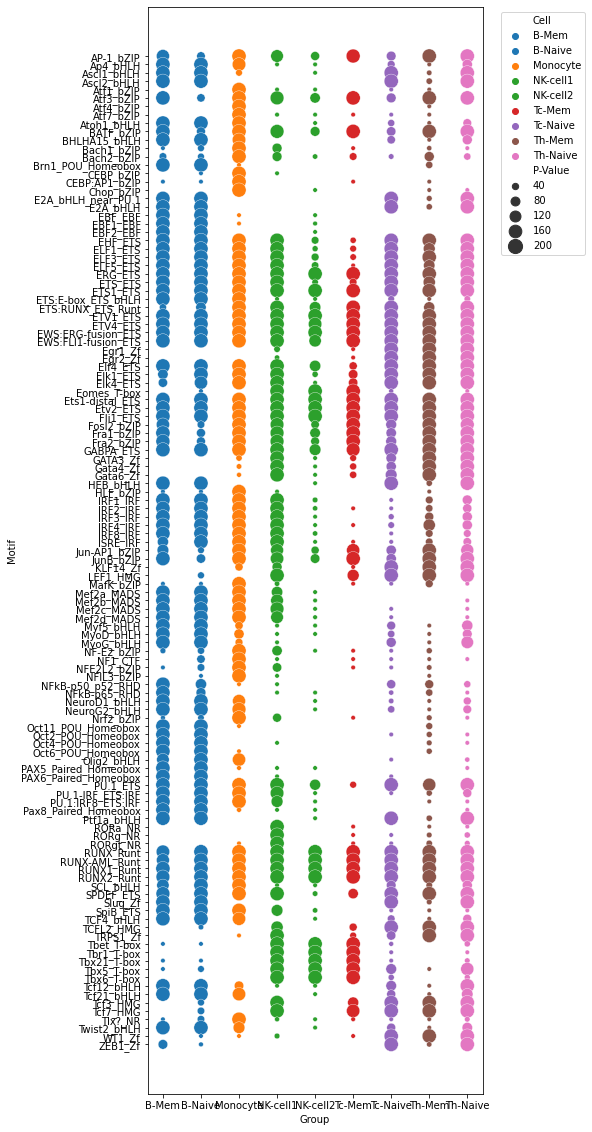

In [52]:
fig, ax = plt.subplots(1,1, figsize=(6, 20))
ax = sns.scatterplot(data=filter_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', size_norm=(20, 200), palette=cell2color, ax=ax, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig("Ctrl_Motif_bubblePlot.pdf")

In [25]:
filter_motif

,B-Mem,B-Naive,B-cell,Monocyte,NK-cell,NK-cell1,NK-cell2,Tc-Mem,Tc-Naive,Th-Mem,Th-Naive,Motif
ShortName,,,,,,,,,,,,
AP-1_bZIP,7.392317,6.156639,9.196233,11.118292,7.187847,7.298292,6.310158,7.591709,6.520265,8.010108,7.745506,AP-1_bZIP
Ap4_bHLH,8.295080,9.424586,5.209453,7.503826,6.136684,3.521051,3.033335,NaN,5.891419,3.816600,6.665336,Ap4_bHLH
Ascl1_bHLH,9.543612,10.147205,4.039138,5.484460,5.344118,NaN,3.013284,NaN,8.075747,4.837943,8.720415,Ascl1_bHLH
Ascl2_bHLH,9.364135,9.847684,NaN,NaN,4.129283,NaN,NaN,NaN,8.649975,5.306335,9.145677,Ascl2_bHLH
Atf1_bZIP,NaN,NaN,9.199672,9.422065,7.345183,4.000000,2.049282,NaN,2.353888,2.137504,NaN,Atf1_bZIP
...,...,...,...,...,...,...,...,...,...,...,...,...
Tcf12_bHLH,8.602142,9.389309,3.848998,6.464015,5.593055,2.600270,2.420887,NaN,6.800900,4.132577,7.661778,Tcf12_bHLH
Tcf21_bHLH,8.477758,9.588527,5.167920,7.462707,5.972693,NaN,2.423578,NaN,6.303963,3.555816,7.026800,Tcf21_bHLH
Tcf3_HMG,NaN,5.546894,NaN,NaN,NaN,8.079485,NaN,6.914086,10.729621,10.012625,10.890264,Tcf3_HMG


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

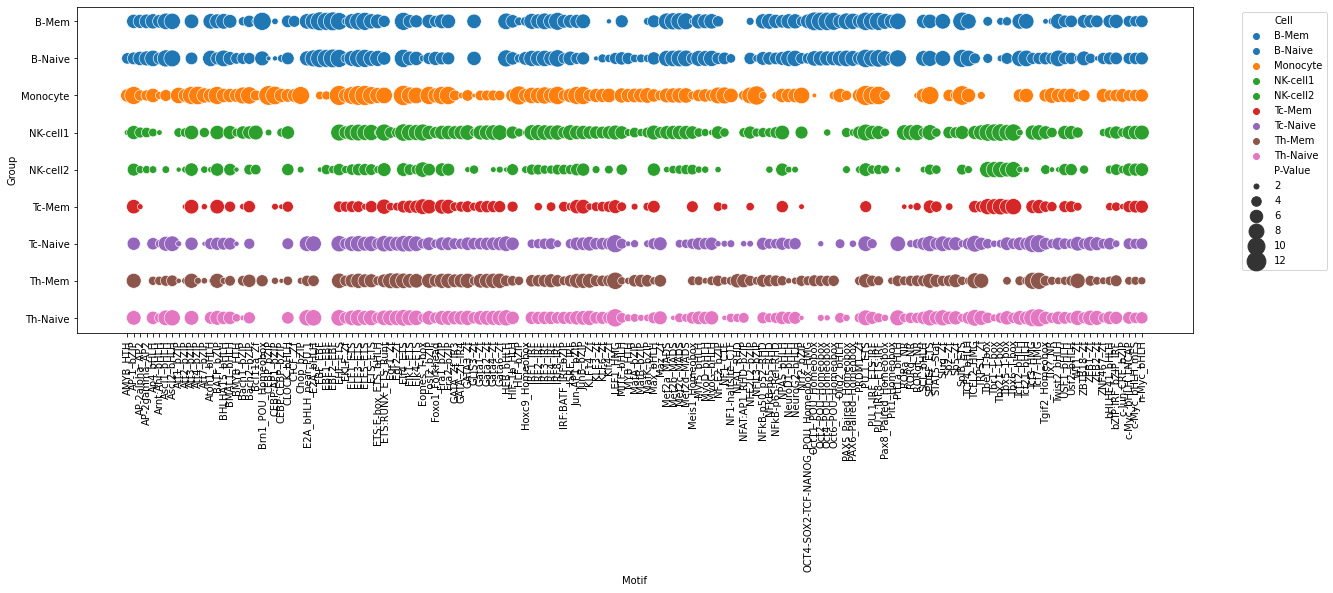

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax = sns.scatterplot(data=filter_motif_melt, y='Group', x='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 400))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
# plt.savefig("Motif_bubblePlot.pdf")